In [7]:
# Imports
import importlib.util, os
import numpy as np
import pandas as pd

from sklearn.pipeline import FunctionTransformer
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
import pickle
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier

# Custom imports for visualisation
spec = importlib.util.spec_from_file_location("utilities", os.path.join("..", "Python-Files", "utilities.py"))
utilities = importlib.util.module_from_spec(spec)
spec.loader.exec_module(utilities)
line_graph = utilities.line_graph
boxplot = utilities.boxplot

# Constants
K_FOLDS = 5
RANDOM_STATE = 420

# Settings  
pd.set_option('display.max_columns', None)

# Import data and split
data = pd.read_csv('../Processed-Datasets/forestCover-Preprocessed.csv')
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [15]:
# Training a base model
cross_validation = KFold(
    n_splits=K_FOLDS,
    shuffle=True,
    random_state=RANDOM_STATE
)

# Gini is fastest
param_grid = {
    "dt__max_depth": [2, 4, 8, 16, 32, 64, 128, 256, 512],
}

# Use weighted due to class imbalance, with robust scaler for outliers
pipeline = Pipeline([
    ("scaler", RobustScaler(unit_variance=True)), 
    ("dt", DecisionTreeClassifier())
])

# -1 for all cores and 3 for to show progress
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cross_validation,
    scoring='f1_macro',
    verbose=3,
    n_jobs=-1
)

grid_search.fit(
    X=train.drop(columns=['Cover_Type']), 
    y=train['Cover_Type']
)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...................dt__max_depth=2;, score=0.290 total time=   8.7s
[CV 5/5] END ...................dt__max_depth=2;, score=0.290 total time=   7.3s
[CV 4/5] END ...................dt__max_depth=2;, score=0.291 total time=  10.3s
[CV 2/5] END ...................dt__max_depth=2;, score=0.290 total time=  11.7s
[CV 3/5] END ...................dt__max_depth=2;, score=0.289 total time=  11.5s
[CV 2/5] END ...................dt__max_depth=4;, score=0.457 total time=  14.3s
[CV 1/5] END ...................dt__max_depth=4;, score=0.451 total time=  14.6s
[CV 3/5] END ...................dt__max_depth=4;, score=0.445 total time=  14.8s
[CV 5/5] END ...................dt__max_depth=4;, score=0.460 total time=  10.2s
[CV 4/5] END ...................dt__max_depth=4;, score=0.461 total time=  12.1s
[CV 1/5] END ...................dt__max_depth=8;, score=0.577 total time=  15.5s
[CV 2/5] END ...................dt__max_depth=8;,

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'dt__max_depth': [2, 4, ...]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,with_centering,True


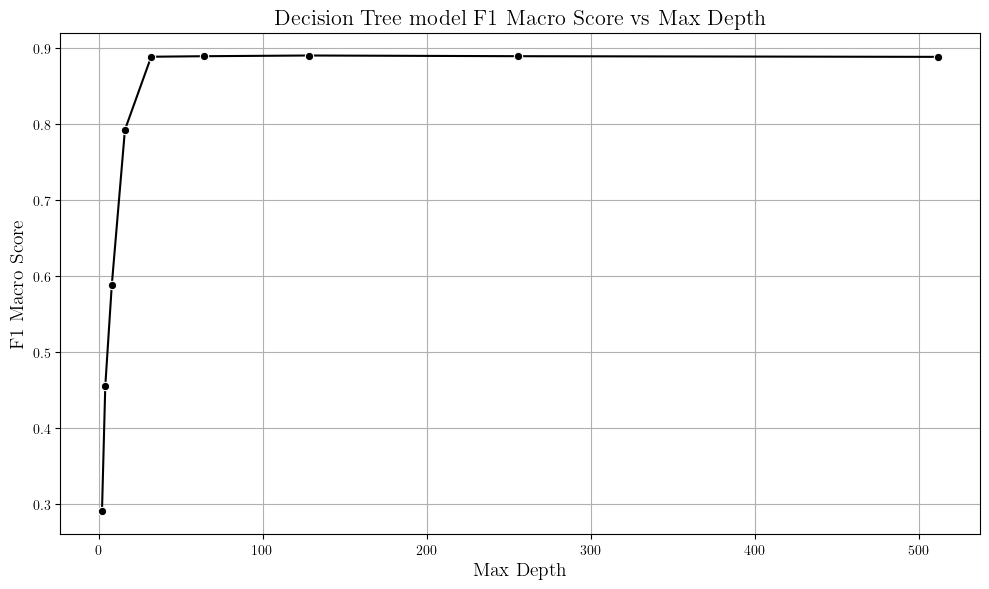

In [16]:
line_graph(
    x=[int(x) for x in grid_search.cv_results_['param_dt__max_depth'].data],
    y=grid_search.cv_results_['mean_test_score'],
    x_label='Max Depth',
    y_label='F1 Macro Score',
    title='Decision Tree model F1 Macro Score vs Max Depth',
    save_dir='../Generated-Figures/DT-F1-MaxDepth.pdf'
)

In [17]:
# Training a base model
cross_validation = KFold(
    n_splits=K_FOLDS,
    shuffle=True,
    random_state=RANDOM_STATE
)

# Gini is fastest
param_grid = {
    "dt__max_depth": [32],
    "dt__min_samples_split": [2, 4, 8, 16, 32, 64, 128],
}

# Use weighted due to class imbalance, with robust scaler for outliers
pipeline = Pipeline([
    ("scaler", RobustScaler(unit_variance=True)), 
    ("dt", DecisionTreeClassifier())
])

# -1 for all cores and 3 for to show progress
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cross_validation,
    scoring='f1_macro',
    verbose=3,
    n_jobs=-1
)

grid_search.fit(
    X=train.drop(columns=['Cover_Type']), 
    y=train['Cover_Type']
)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 3/5] END dt__max_depth=32, dt__min_samples_split=2;, score=0.891 total time=  19.6s
[CV 1/5] END dt__max_depth=32, dt__min_samples_split=2;, score=0.892 total time=  20.1s
[CV 1/5] END dt__max_depth=32, dt__min_samples_split=4;, score=0.888 total time=  20.6s
[CV 4/5] END dt__max_depth=32, dt__min_samples_split=2;, score=0.891 total time=  20.9s
[CV 2/5] END dt__max_depth=32, dt__min_samples_split=2;, score=0.889 total time=  21.0s
[CV 3/5] END dt__max_depth=32, dt__min_samples_split=4;, score=0.889 total time=  21.3s
[CV 5/5] END dt__max_depth=32, dt__min_samples_split=2;, score=0.885 total time=  21.9s
[CV 2/5] END dt__max_depth=32, dt__min_samples_split=4;, score=0.888 total time=  22.4s
[CV 4/5] END dt__max_depth=32, dt__min_samples_split=4;, score=0.887 total time=  22.1s
[CV 1/5] END dt__max_depth=32, dt__min_samples_split=8;, score=0.883 total time=  22.1s
[CV 3/5] END dt__max_depth=32, dt__min_samples_split=8;, sco

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'dt__max_depth': [32], 'dt__min_samples_split': [2, 4, ...]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,with_centering,True


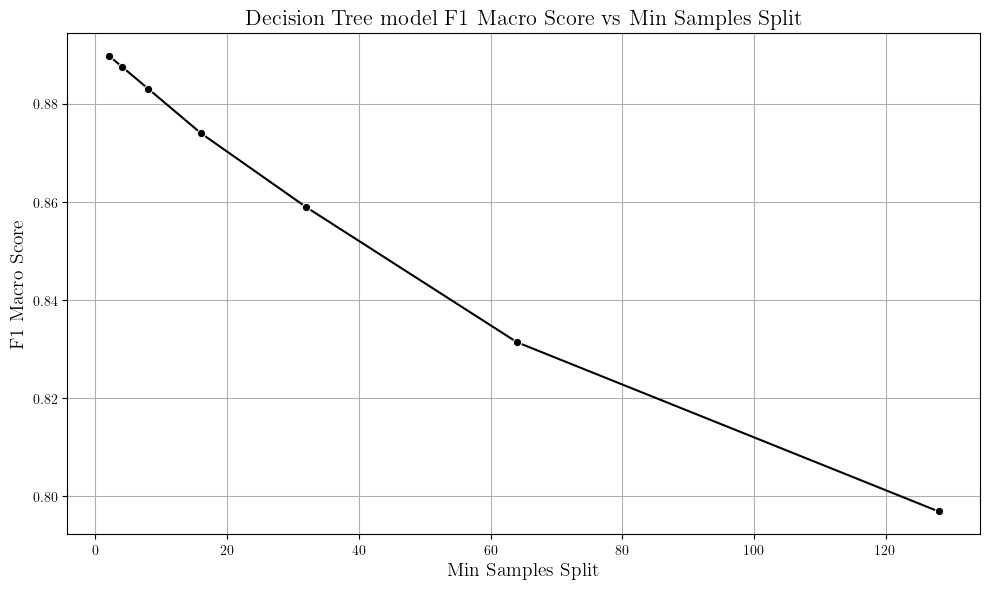

In [18]:
line_graph(
    x=[int(x) for x in grid_search.cv_results_['param_dt__min_samples_split'].data],
    y=grid_search.cv_results_['mean_test_score'],
    x_label='Min Samples Split',
    y_label='F1 Macro Score',
    title='Decision Tree model F1 Macro Score vs Min Samples Split',
    save_dir='../Generated-Figures/DT-F1-MinSamplesSplit.pdf'
)

In [3]:
# Training a base model
cross_validation = KFold(
    n_splits=K_FOLDS,
    shuffle=True,
    random_state=RANDOM_STATE
)

# Gini is fastest
param_grid = {
    "dt__max_depth": [32],
    "dt__min_samples_split": [2],
    "dt__min_samples_leaf": [1, 2, 4, 8, 16, 32, 64],
}

# Use weighted due to class imbalance, with robust scaler for outliers
pipeline = Pipeline([
    ("scaler", RobustScaler(unit_variance=True)), 
    ("dt", DecisionTreeClassifier())
])

# -1 for all cores and 3 for to show progress
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cross_validation,
    scoring='f1_macro',
    verbose=3,
    n_jobs=-1
)

grid_search.fit(
    X=train.drop(columns=['Cover_Type']), 
    y=train['Cover_Type']
)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END dt__max_depth=32, dt__min_samples_leaf=1, dt__min_samples_split=2;, score=0.891 total time=  18.5s
[CV 3/5] END dt__max_depth=32, dt__min_samples_leaf=2, dt__min_samples_split=2;, score=0.886 total time=  17.9s
[CV 1/5] END dt__max_depth=32, dt__min_samples_leaf=2, dt__min_samples_split=2;, score=0.883 total time=  17.8s
[CV 5/5] END dt__max_depth=32, dt__min_samples_leaf=1, dt__min_samples_split=2;, score=0.887 total time=  19.2s
[CV 4/5] END dt__max_depth=32, dt__min_samples_leaf=1, dt__min_samples_split=2;, score=0.890 total time=  21.1s
[CV 2/5] END dt__max_depth=32, dt__min_samples_leaf=2, dt__min_samples_split=2;, score=0.885 total time=  20.2s
[CV 3/5] END dt__max_depth=32, dt__min_samples_leaf=1, dt__min_samples_split=2;, score=0.892 total time=  21.2s[CV 2/5] END dt__max_depth=32, dt__min_samples_leaf=1, dt__min_samples_split=2;, score=0.888 total time=  21.5s

[CV 4/5] END dt__max_depth=32, dt__min_sampl

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'dt__max_depth': [32], 'dt__min_samples_leaf': [1, 2, ...], 'dt__min_samples_split': [2]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,with_centering,True


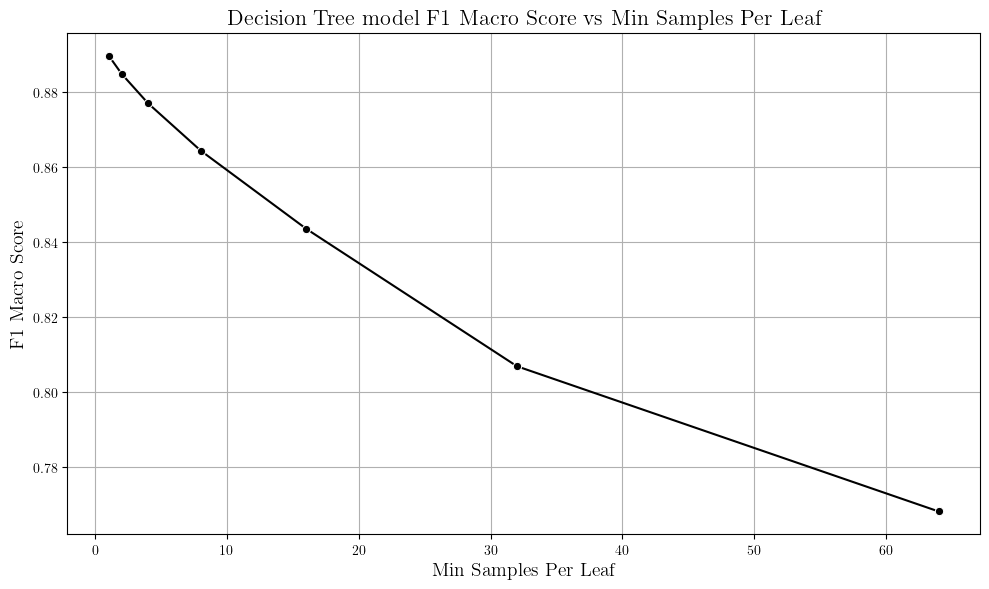

In [5]:
line_graph(
    x=[int(x) for x in grid_search.cv_results_['param_dt__min_samples_leaf'].data],
    y=grid_search.cv_results_['mean_test_score'],
    x_label='Min Samples Per Leaf',
    y_label='F1 Macro Score',
    title='Decision Tree model F1 Macro Score vs Min Samples Per Leaf',
    save_dir='../Generated-Figures/DT-F1-MinSampleLeaf.pdf'
)

In [10]:
# Training a base model
cross_validation = KFold(
    n_splits=K_FOLDS,
    shuffle=True,
    random_state=RANDOM_STATE
)

# Gini is fastest
param_grid = {
    "dt__max_depth": [32],
    "dt__min_samples_split": [2],
    "dt__min_samples_leaf": [1],
    "dt__max_features": ["sqrt", 0.5, None],
    "dt__class_weight": [None, "balanced"],
    "dt__ccp_alpha": [0.0, 0.1]
}

# Use weighted due to class imbalance, with robust scaler for outliers
pipeline = Pipeline([
    ("scaler", RobustScaler(unit_variance=True)), 
    ("dt", DecisionTreeClassifier())
])

# -1 for all cores and 3 for to show progress
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cross_validation,
    scoring='f1_macro',
    verbose=3,
    n_jobs=-1
)

grid_search.fit(
    X=train.drop(columns=['Cover_Type']), 
    y=train['Cover_Type']
)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END dt__ccp_alpha=0.0, dt__class_weight=None, dt__max_depth=32, dt__max_features=sqrt, dt__min_samples_leaf=1, dt__min_samples_split=2;, score=0.820 total time=   8.1s
[CV 3/5] END dt__ccp_alpha=0.0, dt__class_weight=None, dt__max_depth=32, dt__max_features=sqrt, dt__min_samples_leaf=1, dt__min_samples_split=2;, score=0.819 total time=   8.7s
[CV 2/5] END dt__ccp_alpha=0.0, dt__class_weight=None, dt__max_depth=32, dt__max_features=sqrt, dt__min_samples_leaf=1, dt__min_samples_split=2;, score=0.813 total time=   8.8s
[CV 4/5] END dt__ccp_alpha=0.0, dt__class_weight=None, dt__max_depth=32, dt__max_features=sqrt, dt__min_samples_leaf=1, dt__min_samples_split=2;, score=0.819 total time=   8.9s
[CV 5/5] END dt__ccp_alpha=0.0, dt__class_weight=None, dt__max_depth=32, dt__max_features=sqrt, dt__min_samples_leaf=1, dt__min_samples_split=2;, score=0.795 total time=   9.2s
[CV 2/5] END dt__ccp_alpha=0.0, dt__class_weight=None,

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'dt__ccp_alpha': [0.0, 0.1], 'dt__class_weight': [None, 'balanced'], 'dt__max_depth': [32], 'dt__max_features': ['sqrt', 0.5, ...], ...}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,with_centering,True


In [11]:
print(grid_search.best_params_)

{'dt__ccp_alpha': 0.0, 'dt__class_weight': None, 'dt__max_depth': 32, 'dt__max_features': None, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}


In [14]:
with open('../Pickle-Objects/ClassifierTree-Final-GridSearch.pkl', 'wb') as f:
    pickle.dump(grid_search, f)

In [12]:
# Use weighted due to class imbalance, with robust scaler for outliers

print(grid_search.best_params_)

pipeline = Pipeline([
    ("scaler", RobustScaler(unit_variance=True)), 
    ("dt", DecisionTreeClassifier(ccp_alpha=grid_search.best_params_['dt__ccp_alpha'],
                                  class_weight=grid_search.best_params_['dt__class_weight'],
                                  max_depth=grid_search.best_params_['dt__max_depth'],
                                  max_features=grid_search.best_params_['dt__max_features'],
                                  min_samples_leaf=grid_search.best_params_['dt__min_samples_leaf'],
                                  min_samples_split=grid_search.best_params_['dt__min_samples_split']))
])

pipeline.fit(
    X=train.drop(columns=['Cover_Type']), 
    y=train['Cover_Type']
)

{'dt__ccp_alpha': 0.0, 'dt__class_weight': None, 'dt__max_depth': 32, 'dt__max_features': None, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}


,steps,"[('scaler', ...), ('dt', ...)]"
,transform_input,None
,memory,None
,verbose,False
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,True
,criterion,'gini'
,splitter,'best'


In [13]:
with open('../Pickle-Objects/ClassifierTree-Final.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [23]:
preds = pipeline.predict(test.drop(columns=['Cover_Type']))
print(classification_report(test['Cover_Type'], preds))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     42487
           1       0.94      0.95      0.94     56659
           2       0.92      0.92      0.92      7123
           3       0.86      0.82      0.84       570
           4       0.82      0.79      0.80      1860
           5       0.86      0.85      0.86      3480
           6       0.95      0.94      0.94      4024

    accuracy                           0.93    116203
   macro avg       0.90      0.89      0.89    116203
weighted avg       0.93      0.93      0.93    116203

